In [1]:
filepath = 'data/'

import pandas as pd
import numpy as np
#!pip install pandas_profiling==2.*
from pandas_profiling import ProfileReport

In [2]:
def wrangle(fm_path, tv_path=None):
    if tv_path:
        df = pd.merge(pd.read_csv(fm_path),
                      pd.read_csv(tv_path)).set_index('building_id')
    else:
        df = pd.read_csv(fm_path, index_col='building_id')
        
    
    return df

In [3]:
df = wrangle(filepath + 'train_values.csv', filepath + 'train_labels.csv')
print(df.shape)
df.head()

(260601, 39)


,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

In [5]:
df['damage_grade'].value_counts(normalize=True)

2    0.568912
3    0.334680
1    0.096408
Name: damage_grade, dtype: float64

In [6]:
Report = ProfileReport(df, minimal=True).to_notebook_iframe()

Report

Summarize dataset:   0%|          | 0/48 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

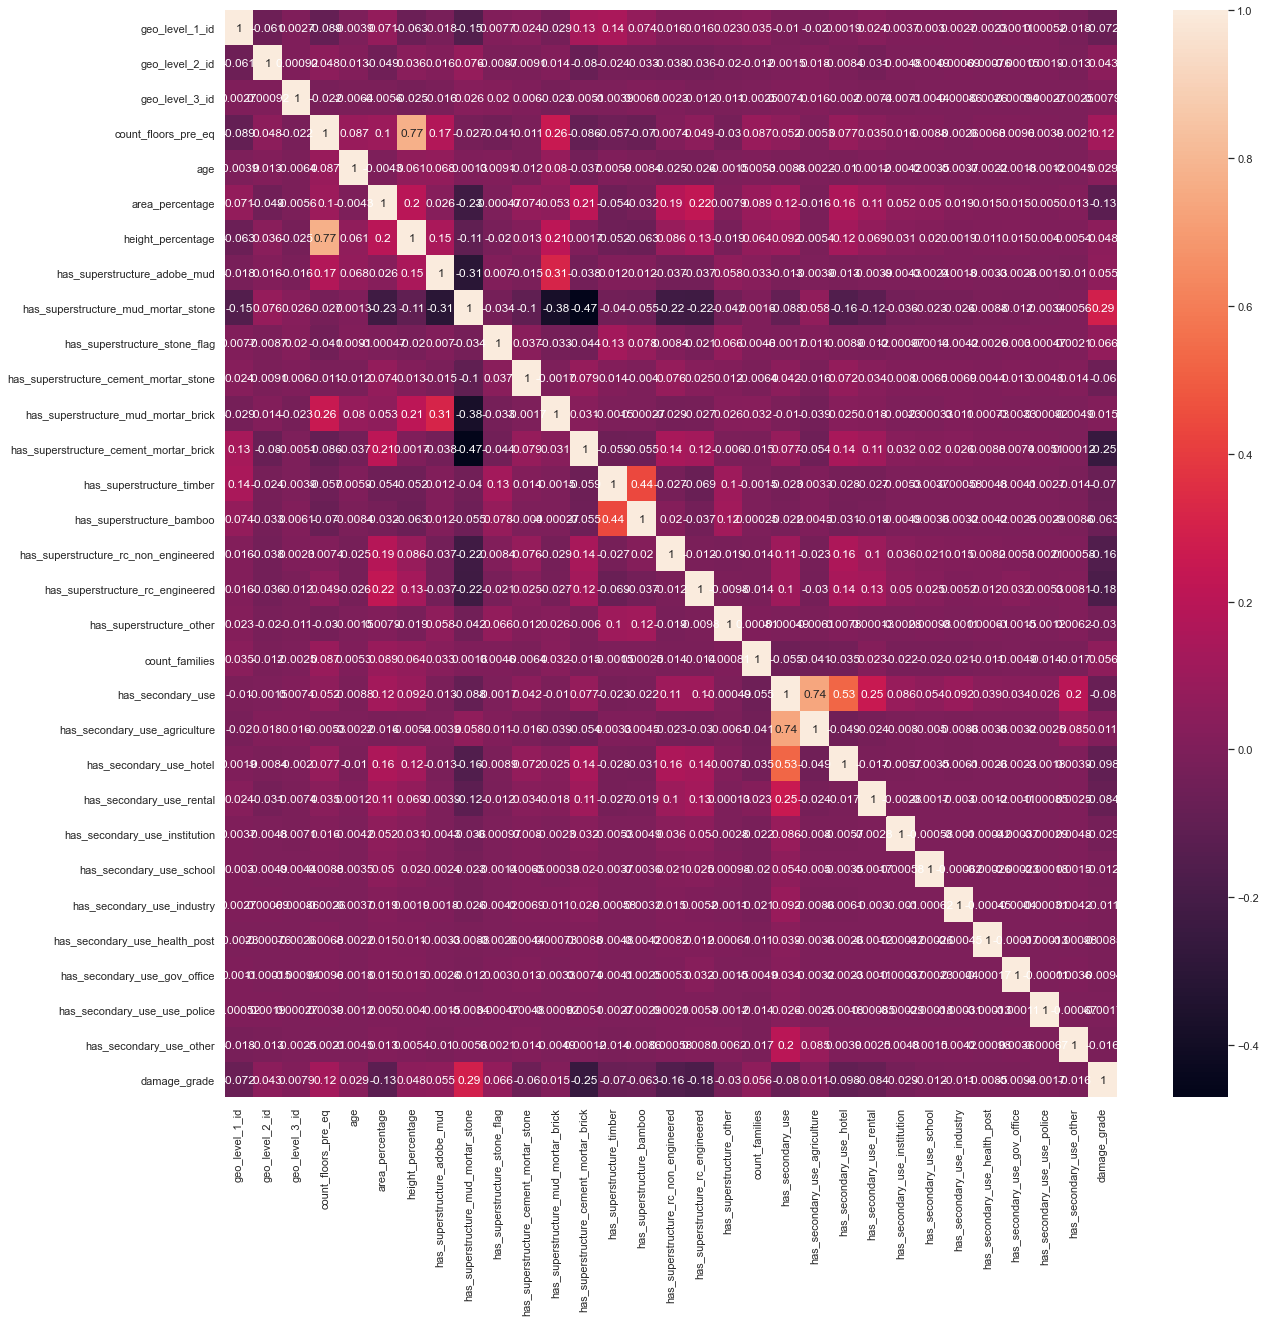

In [109]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df.corr(), annot =True)

In [4]:
target = 'damage_grade'
X = df.drop(columns=target)
y = df[target]
print(X.shape)
y.shape

(260601, 38)


(260601,)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print('Baseline accuracy:', y_train.value_counts(normalize=True).max())

Baseline accuracy: 0.5697045280122793


In [10]:
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline

In [12]:
model = make_pipeline(OrdinalEncoder(), 
                      RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=50, max_depth=15))
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration',
                                      'legal_ownership_status'],
                                mapping=[{'col': 'land_surface_condition',
                                          'data_type': dtype('O'),
                                          'mapping': n      1
o      2
t      3
NaN   -2
dtype: int64},
                                         {'col': 'foundation_type',
                                          'data_type': dtype('O...
                                          'data_type': dtype('O'),
                                          'mapping': s      1
t      2
j      3
o      4
NaN   -2
dtype: int64},
                                         {'col': 'plan

In [13]:
print('Training accuracy: ', model.score(X_train, y_train))
print('Validation accuracy: ', model.score(X_val, y_val))

Training accuracy:  0.7250911358403683
Validation accuracy:  0.6881679169624527
